In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [1]:
data = pd.read_csv("/content/drive/MyDrive/IP 2024/Team Analysis/country_data.csv")
data.head()

NameError: name 'pd' is not defined

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49


child_mort
Skew : 1.451


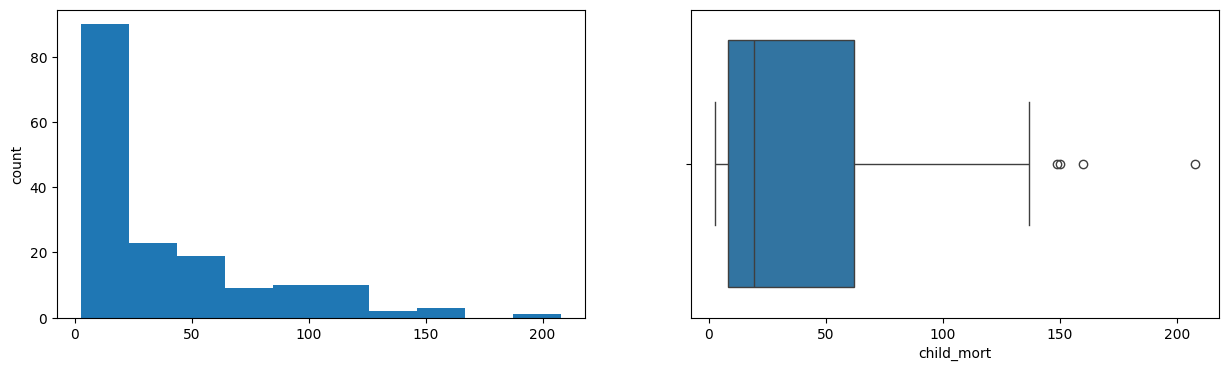

exports
Skew : 2.446


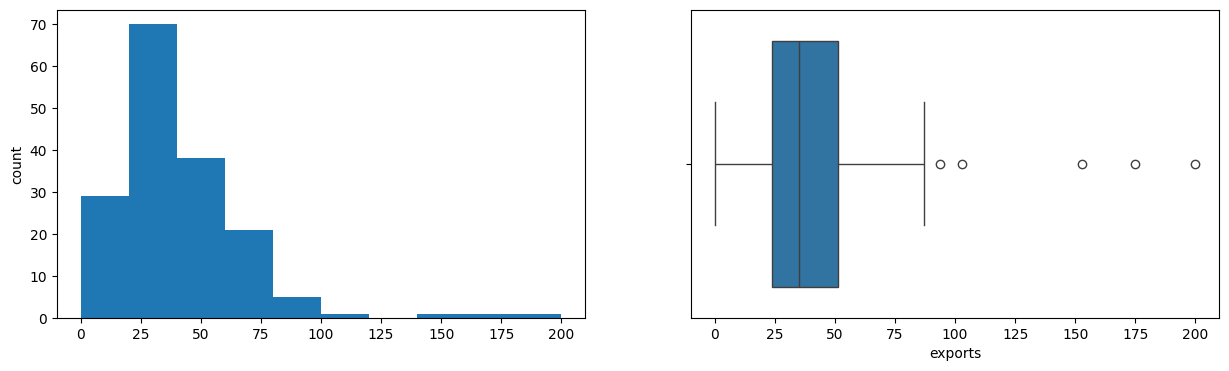

health
Skew : 0.706


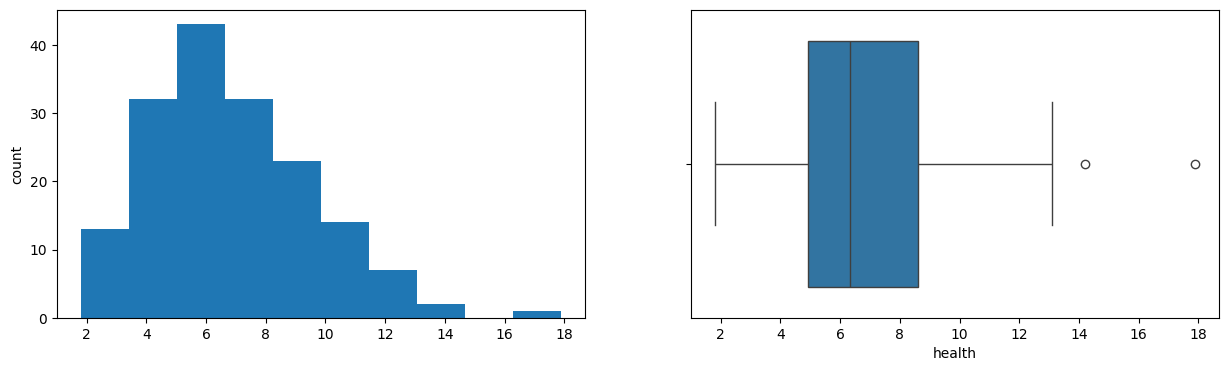

imports
Skew : 1.905


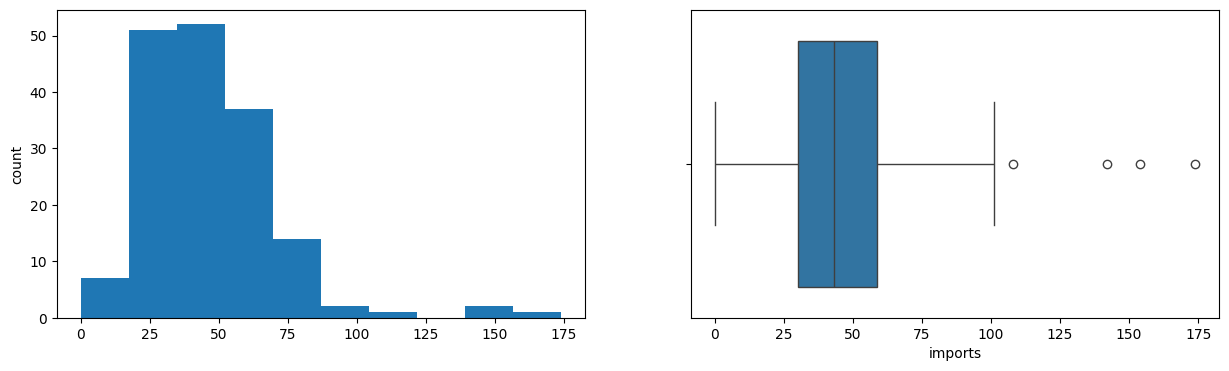

income
Skew : 2.231


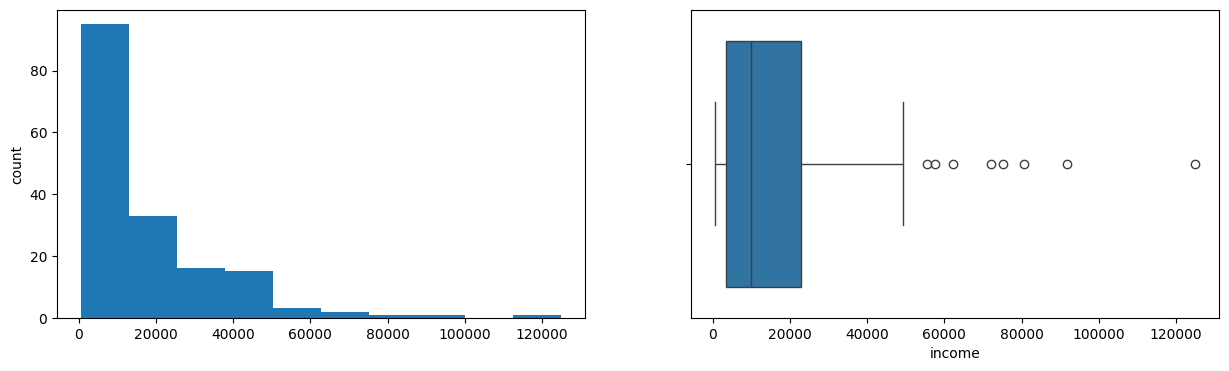

inflation
Skew : 5.154


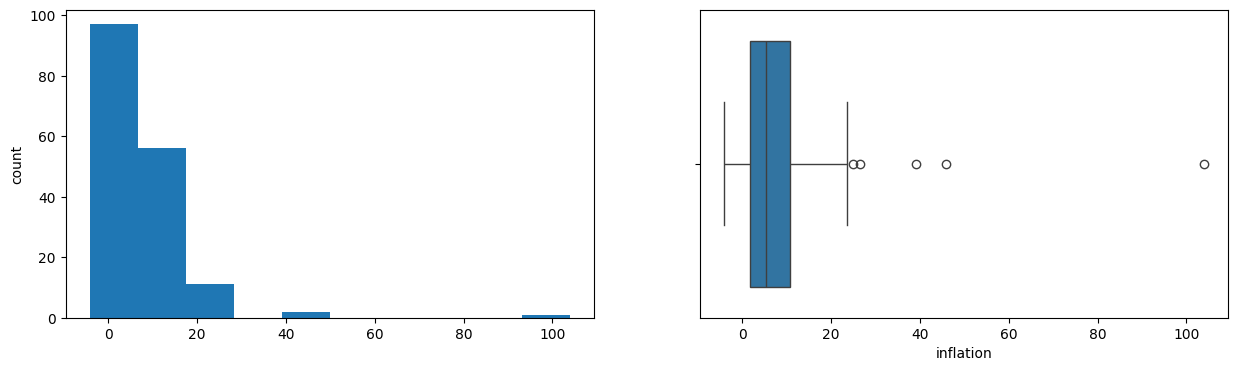

life_expec
Skew : -0.971


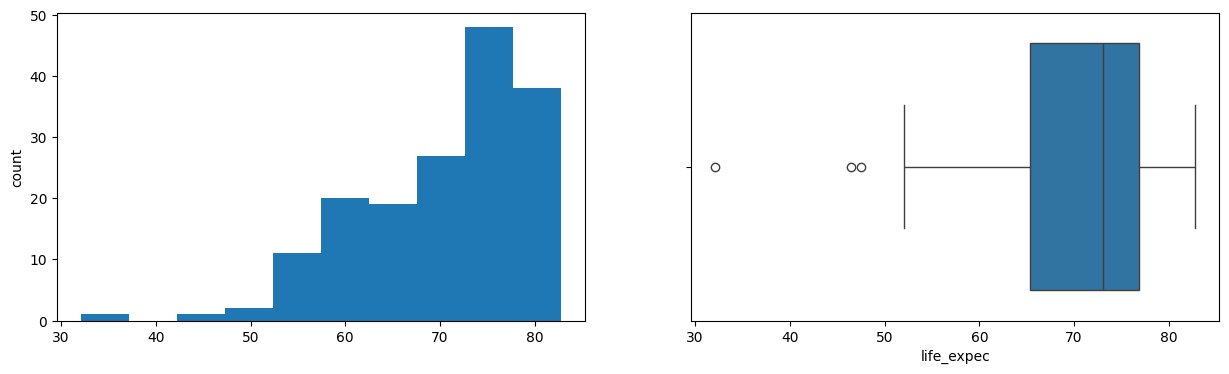

total_fer
Skew : 0.967


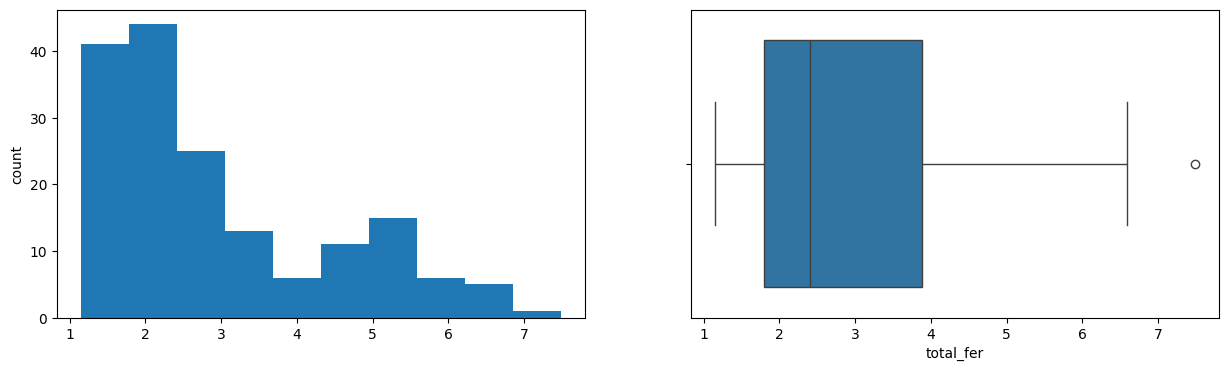

In [ ]:
for col in data.columns[1:]:
    print(col)
    print('Skew :',round(data[col].skew(), 3))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

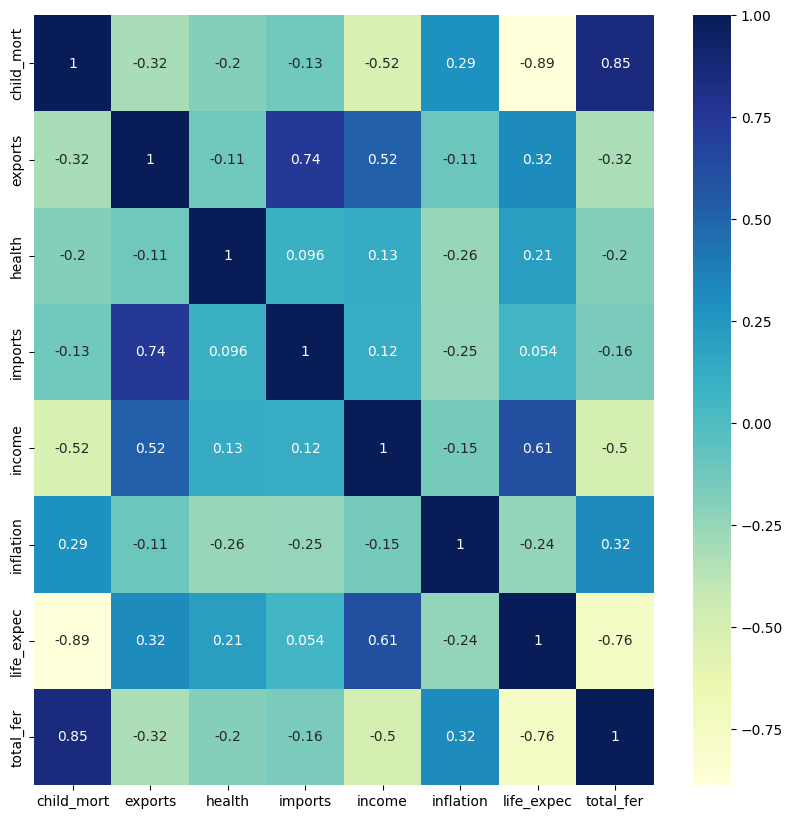

In [ ]:
plt.figure(figsize  = (10,10))
sns.heatmap(data.drop(['country'], axis = 1).corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
data_new = data.drop(columns=["country"])

In [ ]:
#Scaling
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


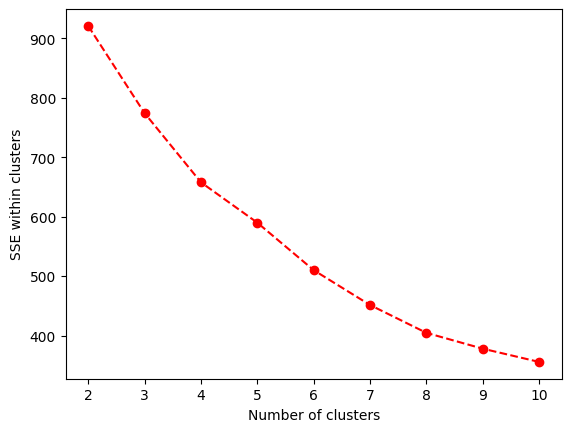

In [ ]:
sse = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'ro--')
plt.xlabel("Number of clusters")
plt.ylabel("SSE within clusters")
plt.show()

In [ ]:
sse.values()

dict_values([920.766403131161, 774.1434119082389, 657.7770477963131, 589.8790583293346, 510.0370874009145, 451.38801966557105, 404.5746532606554, 377.91947717699725, 355.66276954075363])

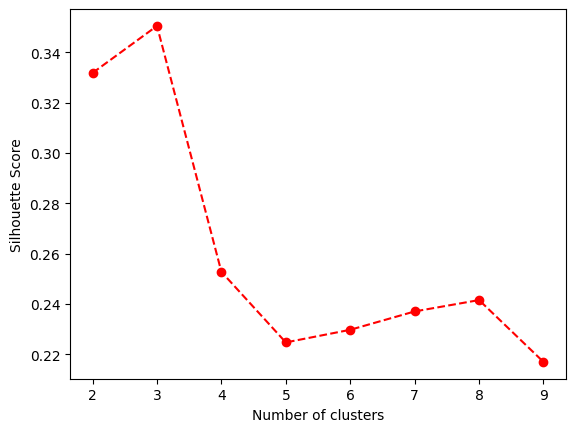

In [ ]:
sc = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Silhouette plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'ro--')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

data_scaled_copy = data_scaled.copy(deep=True)
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_clusters'] = kmeans.predict(data_scaled) + 1

In [ ]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,KMeans_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,1


In [ ]:
data['KMeans_clusters'].value_counts()

KMeans_clusters
1    112
2     52
3      3
Name: count, dtype: int64

In [ ]:
data3 = data.copy()
data3 = data3.drop(['country'], axis = 1)

In [ ]:
mean = data3.groupby('KMeans_clusters').mean()
median = data3.groupby('KMeans_clusters').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['cluster_1 Mean', 'cluster_2 Mean', 'cluster_3 Mean', 'cluster_1 Median', 'cluster_2 Median', 'cluster_3 Median',]
df_kmeans.T

,cluster_1 Mean,cluster_2 Mean,cluster_3 Mean,cluster_1 Median,cluster_2 Median,cluster_3 Median
child_mort,15.703571,88.844231,4.133333,12.450,85.65,2.80
exports,43.487500,28.203827,176.000000,39.600,23.30,175.00
health,7.069464,6.270385,6.793333,6.790,5.48,7.77
imports,46.143750,42.164729,156.666667,44.900,39.75,154.00
income,22069.285714,3832.750000,64033.333333,16250.000,1960.00,72100.00
inflation,6.042920,11.833750,2.468000,3.810,8.95,3.62
life_expec,75.215179,59.892308,81.433333,75.800,60.45,81.30
total_fer,2.119821,4.822115,1.380000,1.995,5.00,1.36


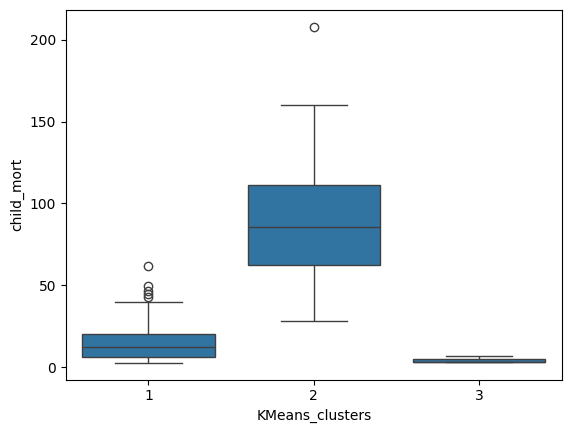

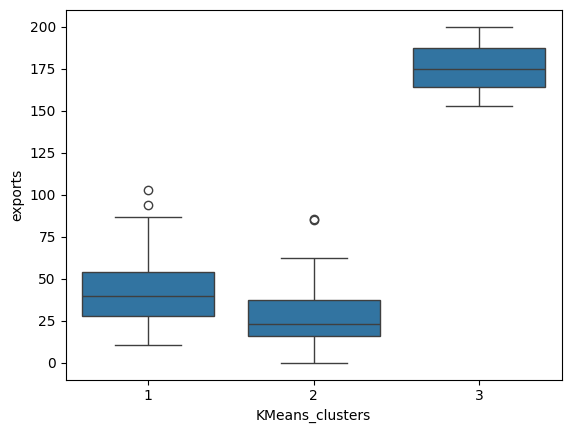

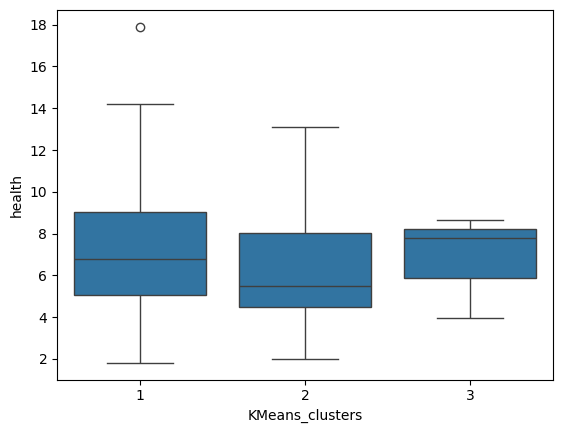

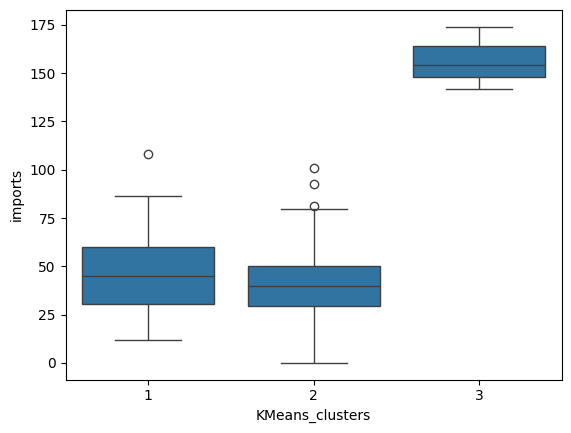

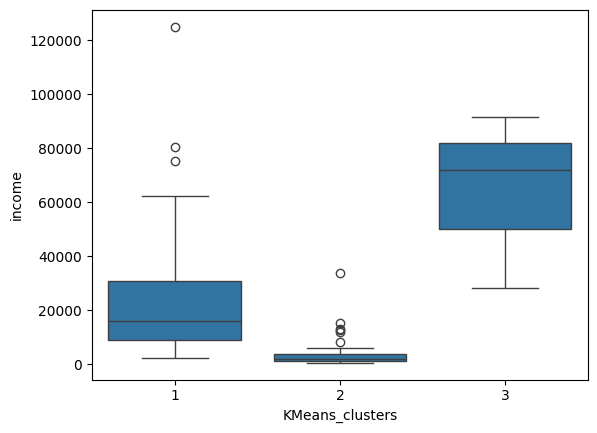

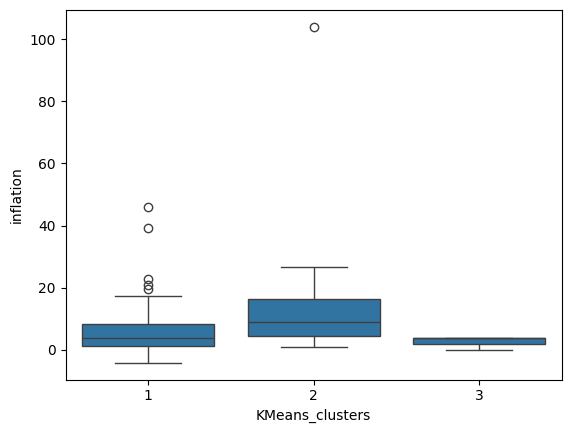

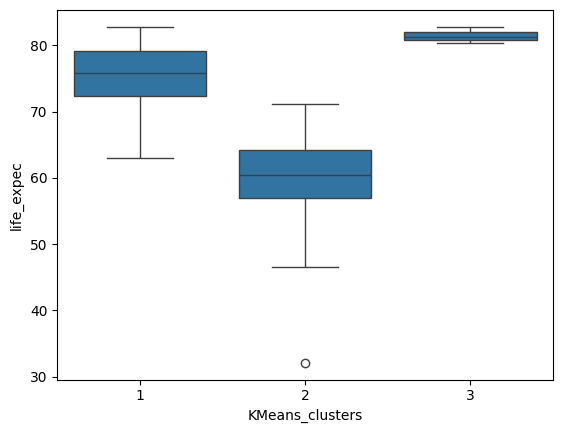

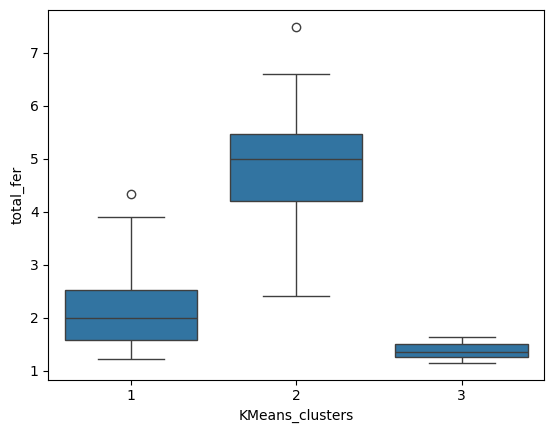

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_clusters', y = col, data = data)
    plt.show()

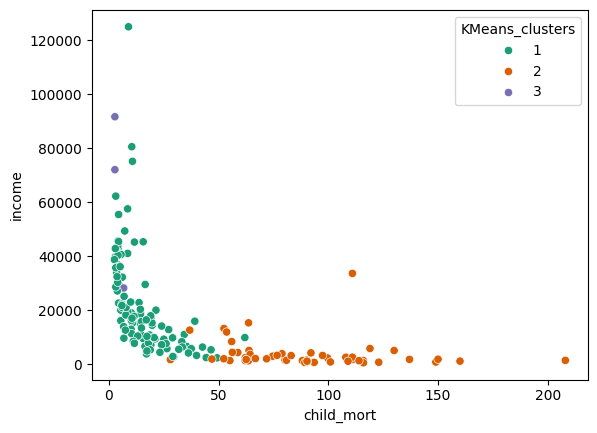

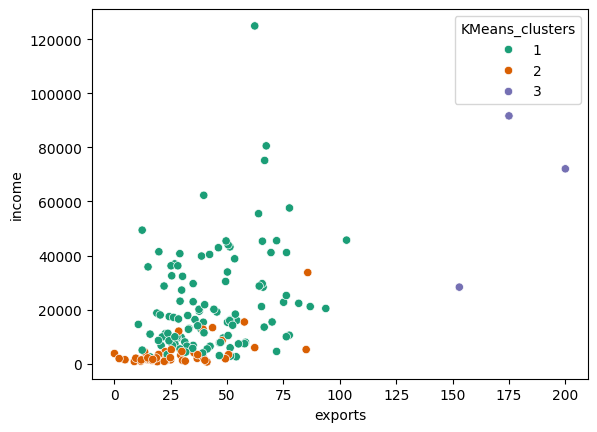

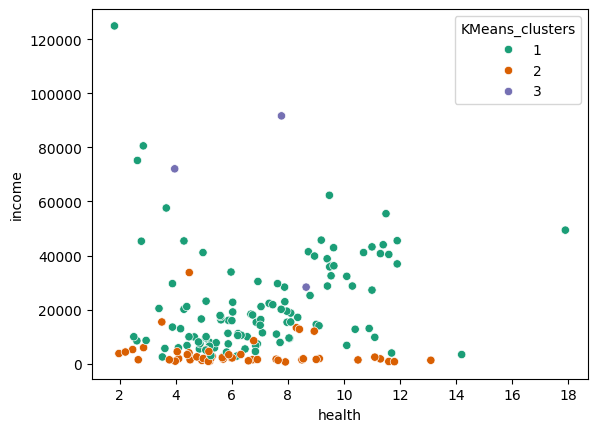

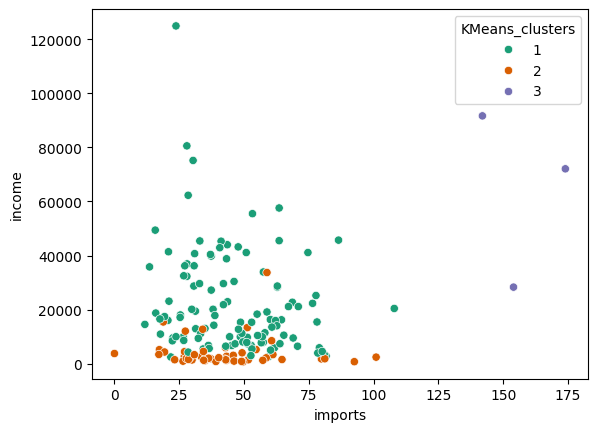

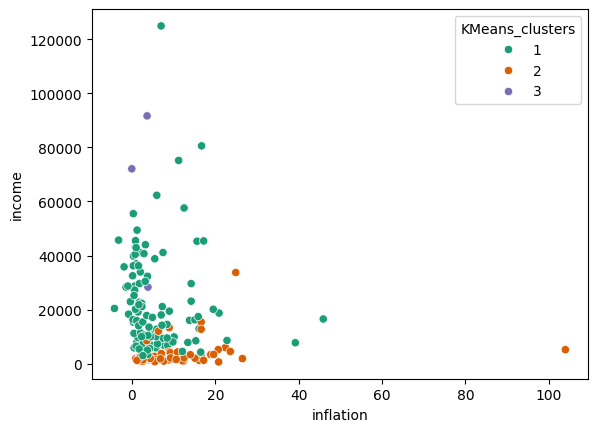

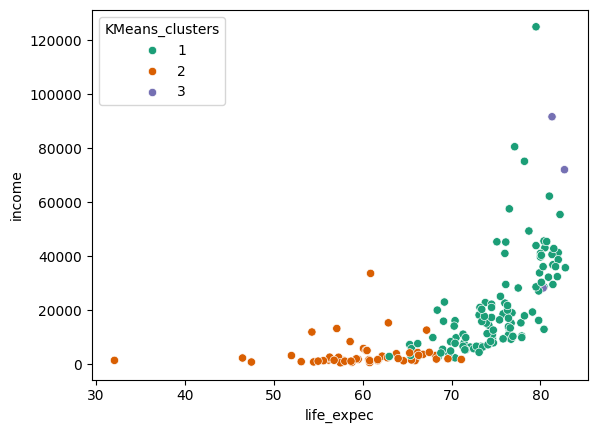

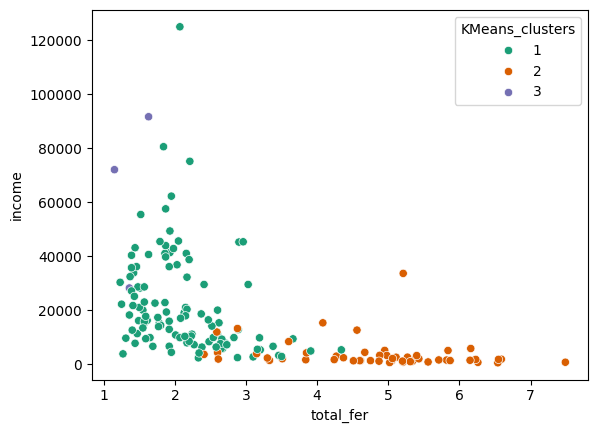

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'income', data = data, hue='KMeans_clusters', palette='Dark2')
    plt.show()